*Project 1 Group 5*

The aim of our project is to uncover opportunities within shorthaul rail in Texas. We'll examine relationships between population projections, emissions, travel time, and other related relationships derived from the data. We'll also examine the impact of the COVID-19 pandemic on shorthaul rail in Texas.

What are the growth rates of Austin and Dallas? What are the existing rail lines connecting the two cities? What is the average fuel consumption for the different modes of transporation for a distance of this Length? How will future population growth affect the future emissions?

In [3]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import requests
import json
import folium
import pprint 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



*Data Sources*

In [ ]:
#Census API
#c2c15d86f334f8f317c455ad5503dc9b7f4a3077

# census_url = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01001_001E&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*"

# #Track Data
# file = "./Texas_Railroads.geojson"
# track_data = gpd.read_file(file)
# #Read track url into dataframe

# # Create a GeoDataFrame from the track_data
# gdf = gpd.GeoDataFrame(track_data, geometry='geometry')

# #emissions Data for plane and train rides

# read PLANE fuel csv file and create dataframe
planes_fuel_csv = "Resources/planes_fuel_data.csv"
planes_fuel_df = pd.read_csv(planes_fuel_csv, encoding="utf-8")

planes_fuel_df

In [ ]:
# read TRAIN fuel csv file and create dataframe
trains_fuel_csv = "Resources/trains_fuel_data.csv"
trains_fuel_df = pd.read_csv(trains_fuel_csv)

trains_fuel_df

In [ ]:
# #Filter out irrelevant tracks
# gdf = gdf[(gdf["GID"] == 8359) 
#           | (gdf["GID"] == 11743) 
#           | (gdf["GID"] == 8263) 
#           | (gdf["GID"] == 10209) 
#           | (gdf["GID"] == 12792) 
#           | (gdf["GID"] == 3255)
#           | (gdf["GID"] == 11098) 
#           | (gdf["GID"] == 11714) 
#           | (gdf["GID"] == 12439) 
#           | (gdf["GID"] == 12741)
#           | (gdf["GID"] == 13101) 
#           | (gdf["GID"] == 5689) 
#           | (gdf["GID"] == 10811)
#           | (gdf["GID"] == 12063)
#           | (gdf["GID"] == 12792)
#           | (gdf["GID"] == 8629)
#           | (gdf["GID"] == 12511)
#           | (gdf["GID"] == 10922)
#           | (gdf["GID"] == 10814)
#           ]

# #Create Map of Texas
# track_map = folium.Map(location=[35,-95], zoom_start=7, tiles="Stamen Terrain")
# folium.GeoJson(
#     gdf
# ).add_to(track_map)

# #Add markers to map indicating Dallas Love Field and Austin Bergstrom International Airport
# #Dallas Fort Worth Field
# folium.vector_layers.CircleMarker(location=[32.897480, -97.040443], radius=5,popup= "Dallas Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Austin Bergstrom International Airport
# folium.vector_layers.CircleMarker(location=[30.1944444444, -97.67], radius=5,popup= "Austin Airport", color='red', fill=True, fill_color='red').add_to(track_map)
# #Houston Airport
# folium.vector_layers.CircleMarker(location=[29.9855555556, -95.3422222222], popup= "Houston Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)

# #Display the Map

# display(track_map)


How are the cities of Austin and Dallas growing?


In [ ]:
#Census Population projections
###What are future growth projections for Austin and Dallas
#Lin Reg or Map
#

What are the existing rail lines between the two cities?
Humdata
Plot a few lines on a map


How much fuel is consumed to fly or take the Train from Dallas to Austin?


In [ ]:
# creating data frame of emissions data
Combined_fuel_emissions = "/Users/geecheeartheauxhokage/Desktop/REPO/Project 1/Group-5-Project-1/Resources/Combined_fuel_emissions.csv"
combined_fuel_emissions_df = pd.read_csv(Combined_fuel_emissions)
combined_fuel_emissions_df


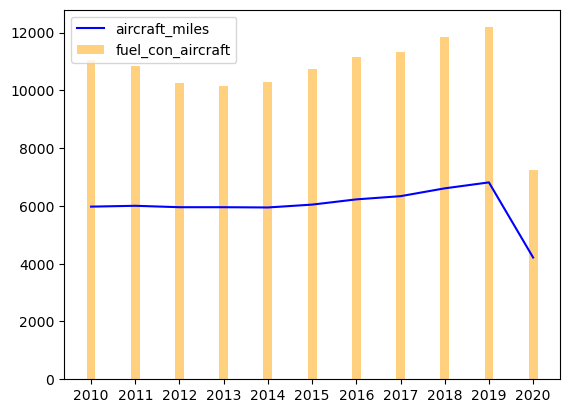

In [15]:
#Fuel consumption of a plane vs train for x miles
#Bar chart comparing the two - fuel consumed
#Bar Chart comparing the two - CO2 emissions

# creating the dataset
x_label = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
fuel_con_aircraft = [11057, 10828,10238,10156,10293,10741,11167,11340,11849,12184,7233]
aircraft_miles = [5976, 6005, 5956,5956,5947, 6046, 6227, 6338,6609,6815,4214]
fuel_consumption_miles_traveled = pd.DataFrame(
  {
    'Fuel Consumption by Aircraft': fuel_con_aircraft,
    'Aircraft Miles Traveled': aircraft_miles,
    
  }, 
  index=x_label
)
x = x_label
y1 = aircraft_miles
y2 = fuel_con_aircraft


plt.plot(x, y1, "-b", label="aircraft_miles")
plt.bar(x, y2, width=0.2, alpha=0.5, color='orange', label="fuel_con_aircraft" )

plt.legend(loc="upper left")
plt.show()


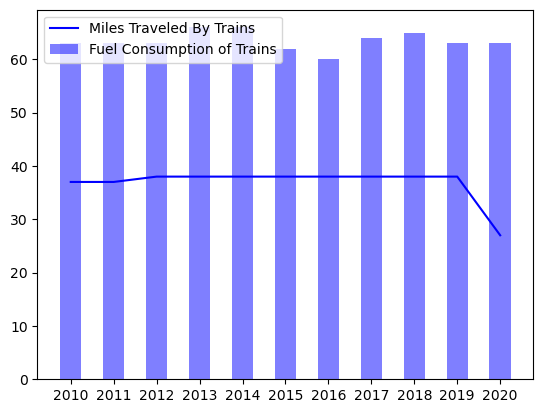

In [17]:
#Fuel consumption of a plane vs train for x miles
#Bar chart comparing the two - fuel consumed
#Bar Chart comparing the two - CO2 emissions

# creating the dataset
x_label = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
fuel_con_trains = [63,63,63,66,66,62,60,64,65,63,63]
train_miles = [ 37,37,38,38,38,38,38,38,38,38,27]
fuel_consumption_miles_traveled = pd.DataFrame(
  {'Fuel Consumption by Trains' : fuel_con_trains,
    'Miles traveled by Train' : train_miles
  }, 
  index=x_label
)

x = x_label
y1 = train_miles
y2= fuel_con_trains
plt.plot(x, y1, "-b", label= "Miles Traveled By Trains")
plt.bar(x, y2, width=.50 ,alpha=0.5, color= 'blue', label="Fuel Consumption of Trains")
plt.legend(loc="upper left")
plt.show()

How will population growth affect future fuel and CO2 emissions?
